In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('employee_churn_data.csv')
df.head(9540)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [2]:
data = df.copy()

***Exploratory Data Analysis (EDA)***

In [3]:
#Check missing data
df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [4]:
# Department with sorted number of employee turnovers: from highest to lowest
no_turnover = df[df.left == 'yes'].groupby('department').left.count().sort_values()

no_turnover.to_frame()

,left
department,
finance,108
IT,110
logistics,111
admin,119
support,212
marketing,243
operations,436
engineering,437
retail,471


In [17]:
turnover_rate = df.left.value_counts()/len(df)
turnover_rate

no     0.708176
yes    0.291824
Name: left, dtype: float64

Looks like about 29% of the employees left.

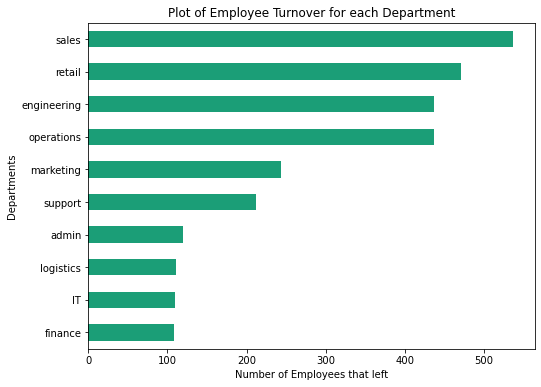

In [5]:
# Department with sorted number of employee turnovers: from highest to lowest

fig, ax = plt.subplots(figsize=(8, 6))
no_turnover.plot.barh(ax=ax, title="Plot of Employee Turnover for each Department", colormap='Dark2')
plt.xlabel("Number of Employees that left")
plt.ylabel("Departments")
plt.show()

**1. Which department has the highest employee turnover? Which one has the lowest?**

The Department with the highest number of employee turnover as seen above is the Sales department,

while the departments with the least is the Finance and IT department.

In [ ]:
#Statistical Overview of the employee turnover dataset
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [20]:
#Turnover Summary
turnover_summary = df.groupby('left')
turnover_summary.mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


turnover summary, 
it can be seen that the employees who got promoted did not leave, whereas the employees that did not get promoted left.

Of the unpromoted employees around 30% have left, while of the promoted employees around 20% have left.

It seems there is about 10% impact of promotion per employee churn.

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000


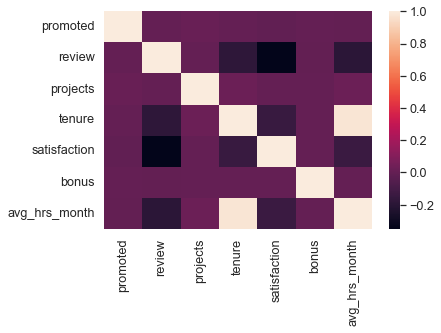

In [21]:
#Correlation Matrix and Heatmap
import seaborn as sns
corr = df.corr()
corr = (corr)
sns.heatmap(corr, xticklabels = corr.columns.values,
                  yticklabels = corr.columns.values)
corr

**Findings from the correlation Matrix and Heatmap**

Positively Correlated Features:

review vs left: 0.304294
tenure vs avg_hrs_month: 0.978618
Negatively Correlated Features:
review vs satisfaction: -0.349778

Summary

From the heatmap, there is a positive(+) correlation between review, left, tenure and avg_hrs_month. This can be interpreted as:

The employees decided to leave or stay based on the review they recieved.
The avg_hrs_month is definitely high for the employees working for more number of years.
For the negative(-) correlation the review and satisfaction are highly correlated. This can be interpreted as:

The employees were not satisfied with the reviews they received.

In [23]:
df['left'].replace('no', 0, inplace=True)
df['left'].replace('yes', 1, inplace=True)

In [24]:
#compare the means of employee left review against the employee population review
emp_population = df['review'][df['left'] == 0].mean()
emp_turnover_review = df[df['left']==1]['review'].mean()

print( 'The mean review for the employee population who did not leave is: ' + str(emp_population))
print( 'The mean review for employees that had left is: ' + str(emp_turnover_review) )

The mean review for the employee population who did not leave is: 0.635163672768492
The mean review for employees that had left is: 0.6922619851915817


In [27]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['left']==1]['review'], # Sample of Employee review who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover review mean

Ttest_1sampResult(statistic=31.59278288897046, pvalue=1.7875413653279587e-187)

T-Test Result

The test result shows the test statistic "t" is equal to 31.59. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

T-Test Quantile

If the t-statistic value we calculated above (31.59) is outside the quantiles, then we can reject the null hypothesis

In [29]:
degree_freedom = len(df[df['left']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.960816457740003
The t-distribution right quartile range is: 1.9608164577400025


One-Sample T-Test Summary

T-Test = 31.59 | P-Value = 1.78 | Accept Null Hypothesis

Accept the null hypothesis because:

-T-Test score is outside the quantiles -P-value is greater than confidence level of 5% Based on the statistical analysis of a one sample t-test, there seems to no significant difference between the mean review of employees who had a turnover and the entire employee population. The super high P-value of 1.78_ at a 5% confidence level is a good indicator to accept the null hypothesis.